**Kaggle team name**: Interstellar_Na_Rivas_Yoo 
1. Format: `🐧[BB Team#]-[Your fancy Kaggle group name]-[Students' names]`. 
  1. Eg. `🐧A-Heros-Fleischer,Melnikov`, where `🐧` identifies JHU and `A` identifies the group code in Canvas

Your private LB score must be reproducible with this Colab. Seed all [RNG](https://en.wikipedia.org/wiki/Random_number_generation). Don't exceed runtime quota.

<small><hr style="margin:0;background-color:silver"><font color=gray>Notebook author: <a href="https://www.linkedin.com/in/olegmelnikov/" target="_blank">Oleg Melnikov</a>, ©<a href="https://apps.ep.jhu.edu/course-homepages/3765-605-742-deep-neural-networks" target="_blank">JHU</a> 2021 onwards</font></small>

<hr color=darkblue>

# **2🏆🌌Stellar**

<details><summary><font color=darkblue>More info and Kaggle API instructions</font></summary>

[Kaggle competition URL](https://www.kaggle.com/c/jan-30-22stellar/rules). See competition rules, submission, grading, dataset, and performance metric. The **starter code** below produces a baseline model, which you should beat, while respecting the competition rules. Your code starts after the timer. This is your baseline model. Seed all [RNG](https://en.wikipedia.org/wiki/Random_number_generation) for reproducibility!

**Instructions for enabling Kaggle API in Colab**:
1. Accept competition rules before running [Kaggle API](https://github.com/Kaggle/kaggle-api#api-credentials). [Loading Kaggle dataset example](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab)
1. In your Kaggle Account, [Create API Token](https://github.com/Kaggle/kaggle-api#api-credentials) and save the resulting **kaggle.json** file to the [root of your Google Drive](https://drive.google.com/drive/u/0/my-drive) 
2. In Colab, open **Files** panel 🗀 (on the left) and click gray folder icon <font color=gray>🖿</font> to mount your Google drive

Your Kaggle/Google Drive credentials are secure; and Colab's kaggle.json only lasts a Colab session.

</details>


In [ ]:
# Team members: David Na, Carlos Rivas and Yungjun Yoo
from google.colab import drive; drive.mount('/content/gdrive')   # OK to enable, if kaggle.json is stored in Google Drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip -q install --upgrade --force-reinstall --no-deps kaggle > log  # upgrade kaggle package (to avoid a warning)
!mkdir -p ~/.kaggle                                           # .kaggle folder must contain kaggle.json for kaggle executable to properly authenticate you to Kaggle.com
!cp /content/gdrive/MyDrive/kaggle.json ~/.kaggle/kaggle.json >log  # First, download kaggle.json from kaggle.com (in Account page) and place it in the root of mounted Google Drive
#!cp kaggle.json ~/.kaggle/kaggle.json > log                   # Alternative location of kaggle.json (without a connection to Google Drive)
!chmod 600 ~/.kaggle/kaggle.json                              # give only the owner full read/write access to kaggle.json
!kaggle config set -n competition -v jan-30-22stellar          # set the competition context for the next few kaggle API calls. !kaggle config view - shows current settings
!kaggle competitions download >> log                          # download competition dataset as a zip file
!unzip -o *.zip >> log                                        # Kaggle dataset is copied as a single file and needs to be unzipped.
!kaggle competitions leaderboard --show                       # print public leaderboard

- competition is now set to: jan-30-22stellar
Using competition: jan-30-22stellar
 teamId  teamName                                           submissionDate       score    
-------  -------------------------------------------------  -------------------  -------  
8103227  JC-OutOfThisWorld-Lee,Brodsky                      2022-02-13 15:48:37  0.96695  
8111730  JA-Superstars-Corson,Givre,Hogge                   2022-02-13 02:28:00  0.96685  
8767527  Samuel Nathanson                                   2022-06-17 22:56:52  0.96675  
8087531  JE-TBD-Mendola, Xiang                              2022-02-10 19:46:07  0.96665  
8088888  JF-LOGsters-Dinh-Hernandez                         2022-02-13 09:35:24  0.96635  
8094938  JB-TBD-Khan,Natali                                 2022-02-13 00:28:33  0.96555  
8766190  AntoineN1                                          2022-06-17 20:46:54  0.96445  
8118756  JD-Allstars-Merran,Hu                              2022-02-14 02:36:08  0.96395  
8153712 

In [ ]:
%%time
%%capture
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all" 
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, seaborn as sns, os, tqdm, re, sys, cv2, skimage
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression as LR
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA, LinearDiscriminantAnalysis as LDA
ToCSV = lambda df, fname: df.round(2).to_csv(f'{fname}.csv', index_label='id') # rounds values to 2 decimals

class Timer():
  def __init__(self, lim:'RunTimeLimit'=60): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

np.set_printoptions(linewidth=100, precision=2, edgeitems=2, suppress=True)
pd.set_option('max_columns', 20, 'precision', 2, 'display.max_rows', 4)

CPU times: user 668 ms, sys: 31.1 ms, total: 699 ms
Wall time: 714 ms


In [ ]:
df = pd.read_csv('XY_Stellar.csv'); df

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID,Class
0,11.64,21.28,26.28,26.15,24.05,18.87,19.00,8848,5,272,0.84,7740,56824,833,NaN
1,173.09,42.21,22.51,22.83,22.21,19.55,19.96,4156,3,486,0.81,9041,58067,428,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199998,131.31,44.27,24.07,24.64,21.63,19.20,19.03,7076,3,251,0.55,6014,56166,1021,G
199999,22.59,0.25,25.30,25.56,24.09,19.41,19.96,5164,4,511,1.26,9590,57969,878,G


In [ ]:
df.info()   # observe datatypes and any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     200000 non-null  float64
 1   delta     200000 non-null  float64
 2   u         200000 non-null  float64
 3   g         200000 non-null  float64
 4   r         200000 non-null  float64
 5   i         200000 non-null  float64
 6   z         200000 non-null  float64
 7   run_ID    200000 non-null  int64  
 8   cam_col   200000 non-null  int64  
 9   field_ID  200000 non-null  int64  
 10  redshift  200000 non-null  float64
 11  plate     200000 non-null  int64  
 12  MJD       200000 non-null  int64  
 13  fiber_ID  200000 non-null  int64  
 14  Class     160000 non-null  object 
dtypes: float64(8), int64(6), object(1)
memory usage: 22.9+ MB


In [ ]:
# Change string labels to numbers in order of increasing size of the entity (Star < Quasi Star < Galaxy)
# df.Class = df.Class.apply(lambda C: -1 if C=='S' else 0 if C=='Q' else 1 if C=='G' else None) 

In [ ]:
vX = df.query('Class!=Class').drop('Class', axis=1)  # slice a test sample
tXY = df.query('Class==Class')                       # slice training sample
tX, tY = tXY.drop('Class', axis=1), tXY.Class        # split into training I/O

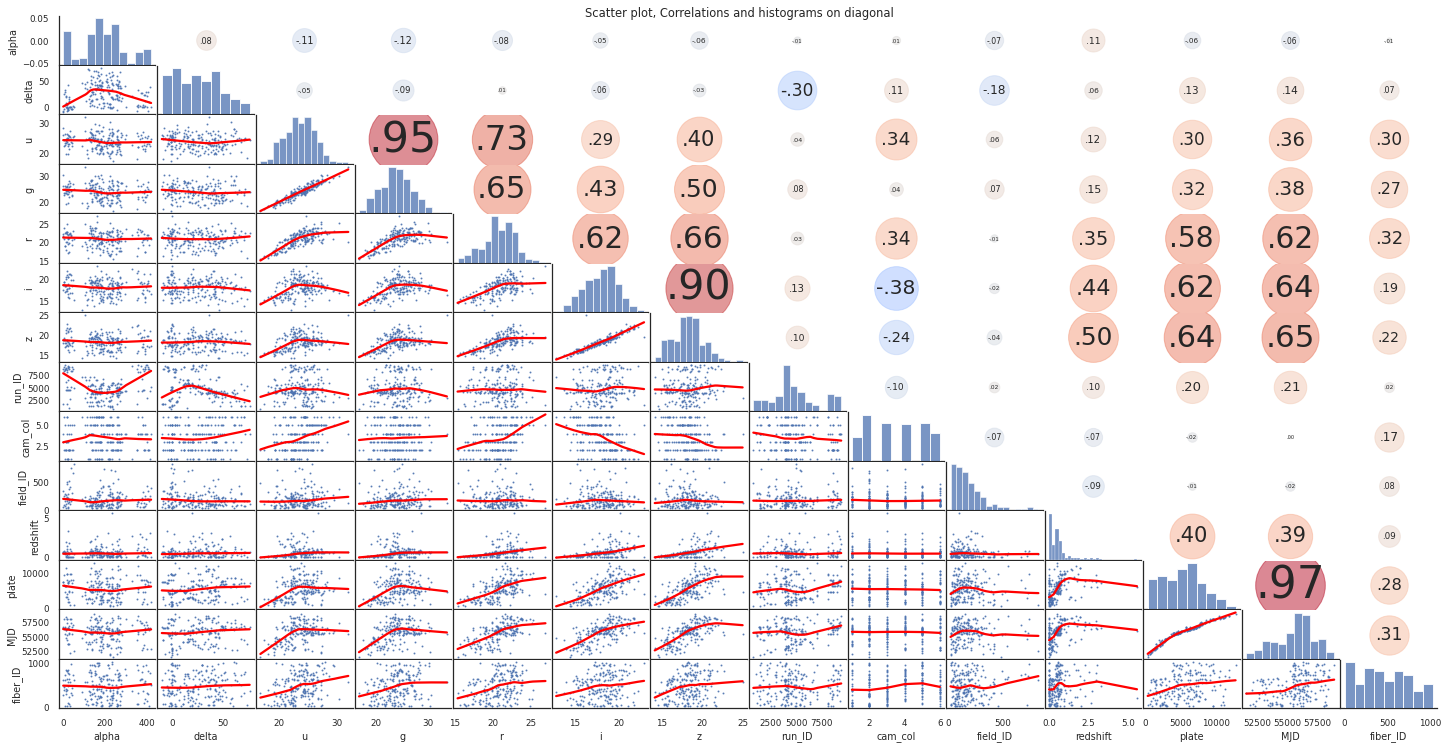

In [ ]:
def ScatterCorrHist(df):
  def corrdot(*args, **kwargs):
    # credit: https://stackoverflow.com/questions/48139899
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca();
    ax.set_axis_off();
    msz = abs(corr_r) * 5000   # marker size
    fsz = abs(corr_r) * 40 + 5 # font size
    ax.scatter([.5], [.5], msz, [corr_r], alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1, transform=ax.transAxes)
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction", ha='center', va='center', fontsize=fsz)

  sns.set(style='white', font_scale=.8);
  g = sns.PairGrid(df, aspect=1, diag_sharey=False);
  g.fig.set_size_inches(20,10)
  g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color':'red'}, scatter_kws={'s':1});
  g.map_diag(sns.histplot, kde_kws={'color':'black'});
  g.map_upper(corrdot);
  g.fig.suptitle("Scatter plot, Correlations and histograms on diagonal", y=1);
  _ = plt.subplots_adjust(hspace=0.02, wspace=0.02);
  _ = plt.show();

ScatterCorrHist(tXY.head(200))

In [ ]:
tmr = Timer()

⏳ started. You have 60 sec. Good luck!


<hr color=red>

<font size=5>⏳</font> <strong><font color=orange size=5>Your Code, Documentation, Ideas and Timer - All Start Here...</font></strong>

**Student's Section** (between ⏳ symbols): add your code and documentation here.

## **Task 1. Preprocessing Pipeline**
 
Explain elements of your preprocessing pipeline i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc. 
1. Why did you choose these elements? (Something in EDA, prior experience,...? Btw, EDA is not required)
1. How do you evaluate the effectiveness of these elements? 
1. What else have you tried that worked or didn't? 

**Student's answer:**

1. 
Based on our prior experience, ID features (fiber_id, field_id, run_id, MJD, plate) are not much correlated to the class. Also, there are too many values for the id and it is not a good idea to perform one-hot-encoding on the id features as well because it will tremendously increase the running time. Therefore, we decided to drop all the id features. All the other features were utilized for the classification because it will be helpful to use any many features as possible if we can extract information from the features. Dropping the ID features also increased the accuracy.

2.
Extensive EDA was performed. We took a look at the distribution of each data feature. Despite the features having a multimodal distribution yet normal enough for prediction, the models were able to get a good accuracy but unfortunately nothing above .96. We used manual feature selection by monitoring the accuracy. We tried many approaches to find the best combination of features, scaling and model. In addition to feature selection, feature engineering was also explored but it did not prove to be beneficial. 

3. 
* <b> One-hot-encoding</b>

First thing we tried for cam_col feature was applying the one-hot-encoding. However, this was not helpful because it generates 7 features and causes a tremendous increase in run time. Even if we ignore run time, one-hot-encoding was not helpful for the accuracy as well. The reason is because we used QDA as our final model. Integer values of cam_col is already distributed close to Gaussian and this was already good for applying QDA. one-hot-encoding did not help much on improving the accuracy.   

* <b> Standard Scaling </b>

Application of standard scaling was one of the key issues for this project. QDA and LDA assumes that all the data are normally distributed. First, we applied the standard scaling for every features. It increased the performance of LDA model but not by much, +0.02. However, QDA did not show as good performance as LDA. The reason is becuase LDA assumes an identical covariance matrix and normalization made the covariance matrix quite close to each feature. However, performance of LDA was not enough to beat the benchmark. We were able to reach around 0.94 with LDA but nothing higher. We thought the reason was because we have two different types of variables (numeric and integer) and covariance matrix for those could not be identical. So we decided to apply QDA for different types of variables. This was successful. Altogether, we were able to reach an accuracy over 0.96 which above the benchmark.   

## **Task 2. Modeling Approach**
Explain your modeling approach, i.e. ideas you tried and why you thought they would be helpful. 

1. How did these decisions guide you in modeling?
1. How do you evaluate the effectiveness of these elements? 
1. What else have you tried that worked or didn't? 

**Student's answer:**

1. 
Logistic regression was a simple method that we used for our classification task. This is the first method we considered for our classification problem. However, for this project, logistic regression did not show enough improvement on performance (accuracy) to beat the bench mark score (0.94990). The reason is because Logistic regression is quite generalized model which does not have an assumption about the distribution of the data. Even though, Logistic regression can be a good choice for the first attempt once we do not have enough knowledge about the distribution of the data, it would not be a good solution to crank up the accuracy with the given distribution of the data. Therefore, we should consider a more powerful algorithm which is specific for the known data distribution. LDA/QDA are well known classification methods which assumes that all the measured data are normally distribution. These are known to be more accurate than Logistic regression for the normally distributed dataset. Based on our EDA, most of the features looks like have Gaussian distribution. Therefore, we have decided to apply the LDA or QDA as a model. Difference between LDA and QDA are the assumptions on the Covariance matrix. LDA assumes the Covariance matrices are identical for all the features whereas QDA assumes the heterogeneity. For this project, there are three different types of variables (numeric, integer and id). We dropped the id type variables since these were not highly correlated to the class. Since we still have two different types of variables, it is hard to expect that covariance matrix would be identical for each feature. Therefore, we decided to use the QDA as our final model. 


2. 
* <b> Scoring metric:</b>
First, we used the classification accuracy as our scoring metric because that is the requirement for this competition. 

* <b> Running time:</b>
One important part for this competition is the running time. We are required to run every code within the time limit (which is 60 sec for this project). So we measured the execution time to check if the code can be run within the time limit.

* <b> Overfitting or Underfitting:</b>
Overfitting or underfitting would be a problem in terms of the generalization. To evaluate this, we performed five fold cross validation to check if our model can be generalized.  

3. 

* <b> degree tuning</b>

For this project, selecting a proper polynomial degree was one of the key issue to increase the accuracy. We started from two and tested by gradually going up and down. Since While performing the degree tuning, we found out that degree 4 showed the best performance within the given time constraint and we have checked this with cross-validation to see whether this choice can lead to overfitting or not. Based on our testing, we had fair results for all folds and we have concluded that degree 4 was not in a range of overfitting.  

* <b> model testing with feature scaling/selection </b>

Proper selection and scaling of the features affected the accuracy of the model. We tried different features with different scaling to three different models. In most cases, QDA/LDA showed better performance than Logistic Regression. Also, based on the scaling, it showed different performance for LDA and QDA. So we have found the best combination of features, scaling, and model, we found out that QDA with no id features, applying no scaling to numeric valued feature showed the best accuracy.  

* <b> maximum usage of built-in library</b>

To minimize the run-time, we tried to utilize the built-in library function (such as sklearn, pandas or numpy) as much as possible. Built-in libraries are already optimized in run-time and validated by a lot of users. So, we maximized the usage of built-in library and used this as our strategy to reduce the run-time.

* <b> Tuning Regularization Parameter </b>

To avoid the overfitting, regularization can be used for all three models. We performed the grid search on the regularization parameter. However, applying the regularization dropped the accuracy and the lowest parameter showed the best performance. Regularization sacrifices the performance to avoid the risk of overfitting. However, in this case, regularization was not helpful because degree 4 was not at risk of overfitting (validated by cross-validation) and our goal is to maximize the accuracy with given constraints (run time). So, we did not apply the regularization for our final model. 

Below is a baseline model that produces the result on Kaggle leaderboard (LB).

##Preprocessing pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler

#cam_col_cat=[1,2,3,4,5,6]
#one_hot_encoder=OneHotEncoder(categories=[cam_col_cat])

#cat_attribs=['cam_col']

#cat_pipeline=ColumnTransformer([("cat",one_hot_encoder,cat_attribs)])
def final_pipeline(df,df_Y=None):   
  
  #This function modifies the training dataset accordingly and returns both the 
  #X dataframe and the corresponding Y dataframe if it is supplied
  
  #this is for applying one-hot encoding
  #df_ohe=df[['cam_col']]
  #df_ohe_encoded=pd.DataFrame(one_hot_encoder.fit_transform(df_ohe).toarray(),index=df_ohe.index)
  
  #df=pd.concat([df,df_ohe_encoded],axis=1)
  
  #this is for applying the standard scaler 
  #scale_features = ["alpha","delta","u", "g", "r", "i", "g"]
  #autoscaler = StandardScaler()
  #df[scale_features] = autoscaler.fit_transform(df[scale_features])

  #this is for dropping features from the data frame
  drop_features = [ "run_ID", "fiber_ID", "plate","MJD","field_ID" ]
  if type(df_Y)!=type(None):
    df_y=df_Y.loc[[x for x in df.index]]
  #df[cat_attribs]=cat_pipeline.fit_transform(df)
  
  df=df.drop(drop_features,axis=1)
  
  

  if type(df_Y)!=type(None):
    return df,df_y
  else:
    return df


## Applying the Model

In [ ]:
#%%time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

tX0, tY0 = tX.iloc[:20000,:], tY[:20000]   # subsample for model selection experiments
vX0, vY0 = tX.iloc[-20000:,:], tY[-20000:] # subsample for model selection experiments

############ Applying the pre-processing pipeline #############################################################################
tX1,tY1=final_pipeline(tX0,tY0)
vX1,vY1=final_pipeline(vX0,vY0)
vX1p=final_pipeline(vX)

poly = PolynomialFeatures(degree=4)    # add non-linear features (powers and interactions)
tX0p = poly.fit_transform(tX1.select_dtypes(include=np.number))  # create object on training set
vX0p = poly.transform(vX1.select_dtypes(include=np.number))      # apply the same object to test set
vXp  = poly.transform(vX1p.select_dtypes(include=np.number))       # apply the same object to test set
###############################################################################################################################


######################### QDA #################################################################################################
m= QDA()

print("QDA:")
print(m.fit(tX0p, tY0).score(vX0p, vY0))   # fit the model and show test error
#################################################################################################################################

######################### LDA ################################################################################################
#m= LDA()
#print("LDA:")
#print(m.fit(tX0p, tY0).score(vX0p, vY0))
################################################################################################################################

############################Logistic Regression ##################################################################################
#model = LR(C=.0001, max_iter=100, n_jobs=-1, multi_class='auto', random_state=0) # always seed your experiments for reproducibility
#print("LR:")
#parameters = {'reg_param':[0.1, 0.9]}
#m=GridSearchCV(model,parameters, cv=5)
#print(m.fit(tX0p, tY0).score(vX0p, vY0))
#####################################################################################################################################

#######################five fold cross-validation ###########################################################################
#this block is to perform cross valudation for checking overfitting. Uncomment following two lines to use
#validated = cross_validate(estimator = m, X = tX0p, y = tY0, cv = 5)
#print(validated['test_score'])
############################################################################################################################




QDA:


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.9621


In [ ]:
pY = pd.DataFrame(m.predict(vXp), index=range(1,len(vX)+1), columns=['Class'])  # ensure that labels and observations are in corresponding order
df.Class.fillna('unknown').value_counts()   # distribution of all train labels
pY.value_counts()                           # distribution of predicted labels
ToCSV(pY, 'MySubmission')

G          95204
unknown    40000
S          34362
Q          30434
Name: Class, dtype: int64

Class
G        23714
S         8787
Q         7499
dtype: int64

# **References:**

1. Géron, A. (2019). Hands-on machine learning with scikit-learn, keras, and tensorflow: Concepts, tools, and techniques to build intelligent systems (2nd edition). O'Reilly Media

2. https://scikit-learn.org/stable/modules/lda_qda.html

3. https://en.wikipedia.org/wiki/Quadratic_classifier#Quadratic_discriminant_analysis

<font size=5>⌛</font> <strong><font color=orange size=5>Do not exceed competition's runtime limit!</font></strong>

<hr color=red>


In [ ]:
tmr.ShowTime()    # measure Colab's runtime. Do not remove. Keep as the last cell in your notebook.

Runtime is 12 sec


## 💡**Starter Ideas**

1. Tune model hyperparameters
1. Try to linear and non-linear feature normalization: shift/scale, log, divide features by features (investigate scatterplot matrix)
1. Try higher order feature interactions and polynomial features on a small subsample. Then identify key features or select key principal components. The final model can be trained on a larger or even full training sample. You can use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the feature set
1. Do a thorough EDA: look for feature augmentations that result in linear decision boundaries between pairs of classes.
1. Evaluate predictions and focus on poorly predicted "groups":
  1. Strongest missclassifications. E.g. the model is very confident about the wrong label
  1. Evaluate predictions near decision boundaries.
1. Do scatter plots show piecewise linear shape? Can a separate linear model be used on each support, or can the pattern be linearized via transformations?
1. How are date/categorical features treated by the model? Is there a [better way](https://www.google.com/search?q=ways+to+encode+categorical+data) to encode these (perhaps, ordinal) features? 
  1. E.g. you could replace codes (or groups of codes) with their frequencies, which may capture the implied "distance" or rarity between category levels.
  1. If encoding ordinal features with integers, should non-equidistant values be considered?
1. Learn astronomy domain and features: [🎦](https://www.youtube.com/results?search_query=Quasi-star), [quasi-star](https://en.wikipedia.org/wiki/Quasi-star), [star](https://en.wikipedia.org/wiki/Star), [galaxy](https://en.wikipedia.org/wiki/Galaxy), [📃](https://arxiv.org/abs/2112.02026)
